In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


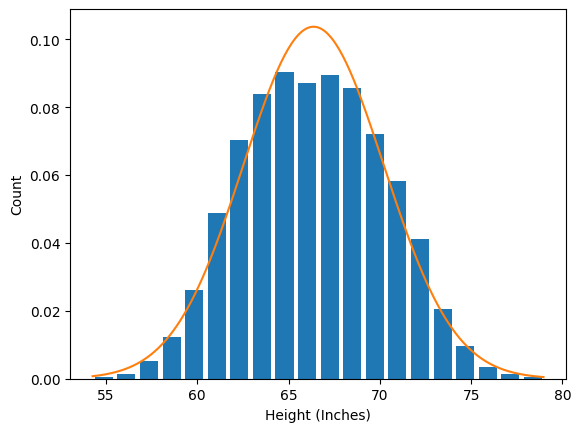

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel("Height (Inches)")
plt.ylabel("Count")

range = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(range, norm.pdf(range, df.Height.mean(), df.Height.std()))

In [8]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [14]:
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [15]:
df[ (df.Height < lower_limit) | (df.Height > upper_limit) ]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [17]:
no_outlier = df[ (df.Height > lower_limit) & (df.Height < upper_limit) ]
no_outlier

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
